In [1]:
 # An initial exploration of park count and tree canopy coverage using HPI data

In [1]:
import pandas as pd
HPI = pd.read_csv('Data/HPI_LA.csv')
HPI.head ()

,CensusTract,Neighborhood,pop2010,pct2010gq,City,ZIP,County_FIPS,County_Name,UrbanType,hpi2score,...,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
0,6037101110,NaN,4731,1.9,Los Angeles,91042,6037,Los Angeles,urban_area,-0.329010,...,25.818042,56.140351,1.564151,10.272670,27.985627,3.022617,0.295921,0.084549,0.634115,Wed13Dec17
1,6037101122,NaN,3664,0.0,Los Angeles,91042,6037,Los Angeles,urban_area,0.282758,...,72.500962,66.512009,0.709607,13.509825,15.693231,3.165939,0.109170,0.027293,0.272926,Wed13Dec17
2,6037101210,NaN,5990,0.9,Los Angeles,91042,6037,Los Angeles,urban_area,-0.359831,...,80.764789,48.247078,3.055092,7.479132,37.045075,3.939900,0.100167,0.050083,0.083472,Wed13Dec17
3,6037101220,NaN,3363,0.1,Los Angeles,91042,6037,Los Angeles,urban_area,-0.287624,...,19.171051,49.420161,1.070473,8.088017,37.823372,3.122212,0.327089,0.059471,0.089206,Wed13Dec17
4,6037101300,NaN,4199,1.2,Los Angeles,91042,6037,Los Angeles,urban_area,0.271041,...,76.825356,75.970469,0.976423,7.549417,11.979043,3.167421,0.119076,0.071446,0.166706,Wed13Dec17


In [2]:
HPI = pd.read_csv(
    'Data/HPI_LA.csv',
    dtype=
    {
        'CensusTract':str,
        'County_FIPS':str,
    }
)

HPI.head ()

,CensusTract,Neighborhood,pop2010,pct2010gq,City,ZIP,County_FIPS,County_Name,UrbanType,hpi2score,...,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
0,06037101110,NaN,4731,1.9,Los Angeles,91042,06037,Los Angeles,urban_area,-0.329010,...,25.818042,56.140351,1.564151,10.272670,27.985627,3.022617,0.295921,0.084549,0.634115,Wed13Dec17
1,06037101122,NaN,3664,0.0,Los Angeles,91042,06037,Los Angeles,urban_area,0.282758,...,72.500962,66.512009,0.709607,13.509825,15.693231,3.165939,0.109170,0.027293,0.272926,Wed13Dec17
2,06037101210,NaN,5990,0.9,Los Angeles,91042,06037,Los Angeles,urban_area,-0.359831,...,80.764789,48.247078,3.055092,7.479132,37.045075,3.939900,0.100167,0.050083,0.083472,Wed13Dec17
3,06037101220,NaN,3363,0.1,Los Angeles,91042,06037,Los Angeles,urban_area,-0.287624,...,19.171051,49.420161,1.070473,8.088017,37.823372,3.122212,0.327089,0.059471,0.089206,Wed13Dec17
4,06037101300,NaN,4199,1.2,Los Angeles,91042,06037,Los Angeles,urban_area,0.271041,...,76.825356,75.970469,0.976423,7.549417,11.979043,3.167421,0.119076,0.071446,0.166706,Wed13Dec17


In [3]:
HPI.info ()
HPI.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 92 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CensusTract              986 non-null    object 
 1   Neighborhood             20 non-null     object 
 2   pop2010                  986 non-null    int64  
 3   pct2010gq                986 non-null    float64
 4   City                     982 non-null    object 
 5   ZIP                      986 non-null    int64  
 6   County_FIPS              986 non-null    object 
 7   County_Name              986 non-null    object 
 8   UrbanType                986 non-null    object 
 9   hpi2score                977 non-null    float64
 10  hpi2_pctile_pos          977 non-null    float64
 11  hpi2_pctile_neg          977 non-null    float64
 12  hpi_top25pct             977 non-null    object 
 13  quintiles                977 non-null    float64
 14  quartiles                9

In [4]:
desired_columns = ['CensusTract','parkaccess','parkaccess_pctile', 'treecanopy', 'treecanopy_pctile']
HPI [desired_columns]
HPI_trimmed = HPI [desired_columns]
HPI_trimmed

,CensusTract,parkaccess,parkaccess_pctile,treecanopy,treecanopy_pctile
0,06037101110,97.42126,57.372001,5.855637,57.513153
1,06037101122,100.00000,81.355062,9.199068,77.005004
2,06037101210,100.00000,81.355062,4.011680,32.606185
3,06037101220,88.76004,47.055049,4.652362,44.116515
4,06037101300,90.73589,49.133838,7.477775,69.023483
...,...,...,...,...,...
981,06037297300,100.00000,81.355062,5.518442,54.343642
982,06037297400,100.00000,81.355062,4.324426,38.457590
983,06037297500,100.00000,81.355062,6.016735,59.091492
984,06037297601,100.00000,81.355062,6.514749,63.107917


In [5]:
columns = list(HPI_trimmed)
columns

['CensusTract',
 'parkaccess',
 'parkaccess_pctile',
 'treecanopy',
 'treecanopy_pctile']

In [6]:
HPI_trimmed.columns = ['FIPS',
 'Park_Access',
 'Park_Access_Percentile',
 'Tree_Canopy',
 'Tree_Canopy_Percentile']
HPI_trimmed.head ()

,FIPS,Park_Access,Park_Access_Percentile,Tree_Canopy,Tree_Canopy_Percentile
0,06037101110,97.42126,57.372001,5.855637,57.513153
1,06037101122,100.00000,81.355062,9.199068,77.005004
2,06037101210,100.00000,81.355062,4.011680,32.606185
3,06037101220,88.76004,47.055049,4.652362,44.116515
4,06037101300,90.73589,49.133838,7.477775,69.023483


In [7]:

HPI_trimmed = HPI_trimmed.sort_values(by='Tree_Canopy',ascending = False)
HPI_trimmed[['FIPS','Tree_Canopy']].head(10)

,FIPS,Tree_Canopy
825,06037261200,20.652590
338,06037141600,20.210195
823,06037261101,19.883298
337,06037141500,19.569714
336,06037141400,19.486557
324,06037139701,19.125964
826,06037262100,19.086587
830,06037262303,18.941309
822,06037243100,18.882921
347,06037143604,18.562241


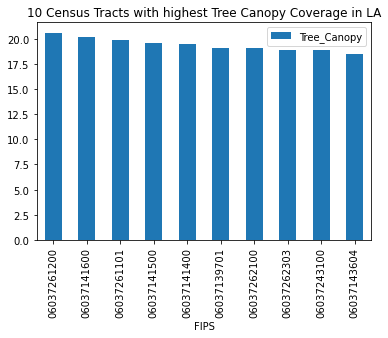

In [8]:
HPI_trimmed.sort_values('Tree_Canopy',ascending=False).head(10).plot.bar(x='FIPS',
                            y='Tree_Canopy',
                           title='10 Census Tracts with highest Tree Canopy Coverage in LA')

In [9]:
HPI_trimmed = HPI_trimmed.sort_values(by='Tree_Canopy',ascending = True)
HPI_trimmed[['FIPS','Tree_Canopy']].head(10)

,FIPS,Tree_Canopy
700,06037226001,1.602414
533,06037206050,1.764766
600,06037212303,1.799636
691,06037224010,2.162962
567,06037209401,2.213683
558,06037208802,2.289196
724,06037229420,2.343863
539,06037207301,2.400490
879,06037269904,2.432109
697,06037224420,2.570740


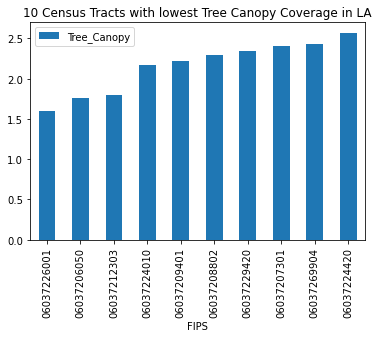

In [10]:
HPI_trimmed.head(10).plot.bar(x='FIPS',
                            y='Tree_Canopy',
                           title='10 Census Tracts with lowest Tree Canopy Coverage in LA')

In [11]:
HPI_trimmed.Park_Access.describe()

count    977.000000
mean      67.051609
std       36.934516
min        0.000000
25%       35.202270
50%       84.114320
75%      100.000000
max      100.000000
Name: Park_Access, dtype: float64

In [12]:
HPI_trimmed[['FIPS','Park_Access']].head(10)

,FIPS,Park_Access
700,06037226001,30.29925
533,06037206050,75.54637
600,06037212303,100.00000
691,06037224010,83.97275
567,06037209401,100.00000
558,06037208802,100.00000
724,06037229420,63.37313
539,06037207301,100.00000
879,06037269904,99.87619
697,06037224420,81.75182


In [13]:
import geopandas as gpd
lacounty=gpd.read_file('Data/la_tracts-Copy1.geojson')
lacounty.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [14]:
lacounty.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   kind          2346 non-null   object  
 1   external_id   2346 non-null   object  
 2   name          2346 non-null   object  
 3   slug          2346 non-null   object  
 4   set           2346 non-null   object  
 5   metadata      2346 non-null   object  
 6   resource_uri  2346 non-null   object  
 7   geometry      2346 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 146.8+ KB


In [15]:
lacounty = lacounty[['name','geometry']]
lacounty.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [16]:
lacounty.columns = ['FIPS','geometry']
lacounty.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


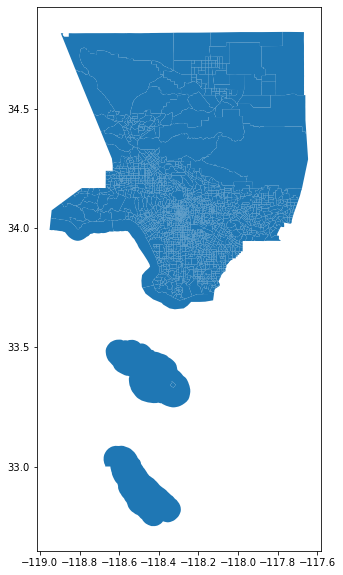

In [17]:
lacounty.plot(figsize=(12,10))

In [18]:
LA = lacounty.merge(HPI_trimmed,on='FIPS')
LA.head ()

,FIPS,geometry,Park_Access,Park_Access_Percentile,Tree_Canopy,Tree_Canopy_Percentile
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",97.42126,57.372001,5.855637,57.513153
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",100.00000,81.355062,9.199068,77.005004
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",100.00000,81.355062,4.011680,32.606185
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",88.76004,47.055049,4.652362,44.116515
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",90.73589,49.133838,7.477775,69.023483


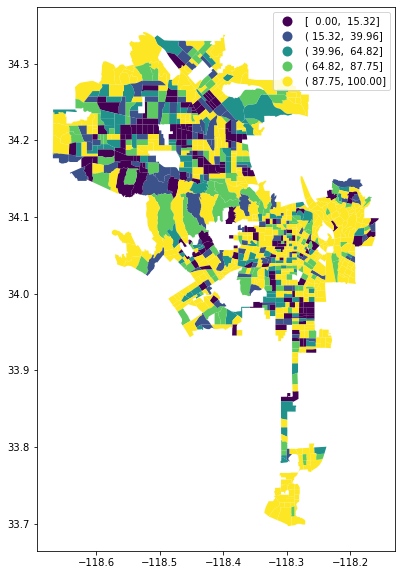

In [20]:
LA.plot(figsize=(12,10),
                 column='Park_Access',
                 legend=True, 
                 scheme='natural_breaks')

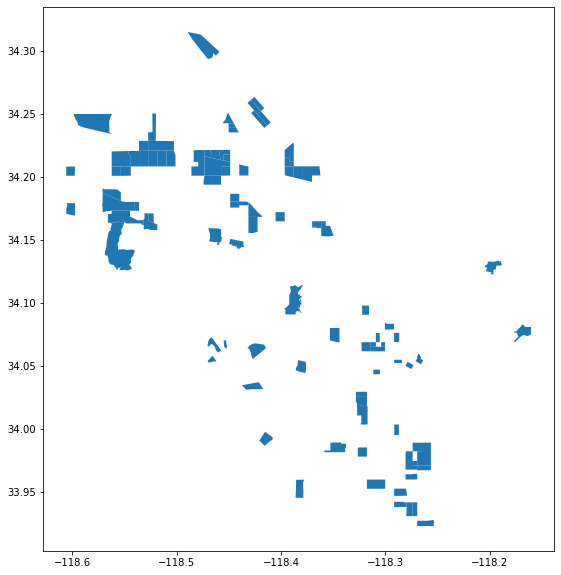

In [21]:
LA[LA.Park_Access==0].plot(figsize=(12,10))

**Census tracts in LA with 0% Park Access**

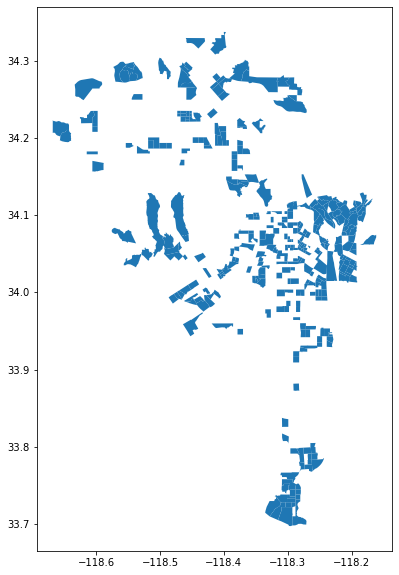

In [22]:
LA[LA.Park_Access==100].plot(figsize=(12,10))

**Census Tracts in LA with 100% park access**

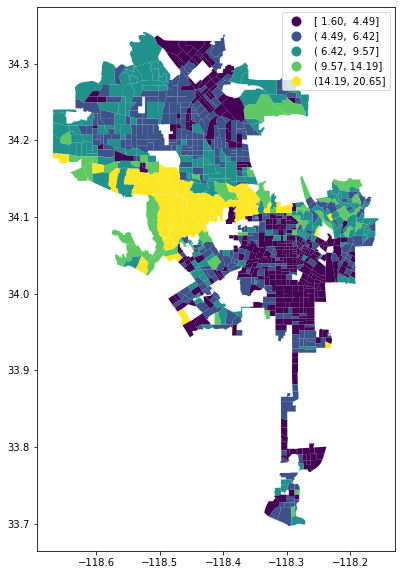

In [24]:
LA.plot(figsize=(12,10),
                 column='Tree_Canopy',
                 legend=True, 
                 scheme='natural_breaks')